## Knapsack using qaoa from qiskit directly, from the portfolio optimization

In [1]:
from qiskit import Aer
from qiskit.algorithms import VQE, QAOA, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit.utils import QuantumInstance
from qiskit_finance.applications.optimization import PortfolioOptimization
from qiskit_finance.data_providers import RandomDataProvider
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.applications import OptimizationApplication
from qiskit_optimization.converters import QuadraticProgramToQubo
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from qiskit import *
from qiskit_optimization import applications


In [7]:
r = applications.Knapsack([45,5,20,50],[50,20,3,60],74)

In [8]:
print(r.to_quadratic_program())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Knapsack

Maximize
 obj: 45 x_0 + 5 x_1 + 20 x_2 + 50 x_3
Subject To
 c0: 50 x_0 + 20 x_1 + 3 x_2 + 60 x_3 <= 74

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1

Binaries
 x_0 x_1 x_2 x_3
End



In [9]:
n = r.to_quadratic_program()

In [10]:
exact_mes = NumPyMinimumEigensolver()
exact_eigensolver = MinimumEigenOptimizer(exact_mes)

result = exact_eigensolver.solve(n)

print(result)

optimal function value: 70.0
optimal value: [1. 1. 1. 0.]
status: SUCCESS


In [11]:
from qiskit.utils import algorithm_globals
algorithm_globals.random_seed = 1234
backend = Aer.get_backend("statevector_simulator")

seed = 123

cobyla = COBYLA()
cobyla.set_options(maxiter=250)
quantum_instance = QuantumInstance(backend=backend, seed_simulator=seed, seed_transpiler=seed)
qaoa_mes = QAOA(optimizer=cobyla, reps=3, quantum_instance=quantum_instance)
qaoa = MinimumEigenOptimizer(qaoa_mes)
result = qaoa.solve(n)

print(result)

optimal function value: 70.0
optimal value: [1. 1. 1. 0.]
status: SUCCESS


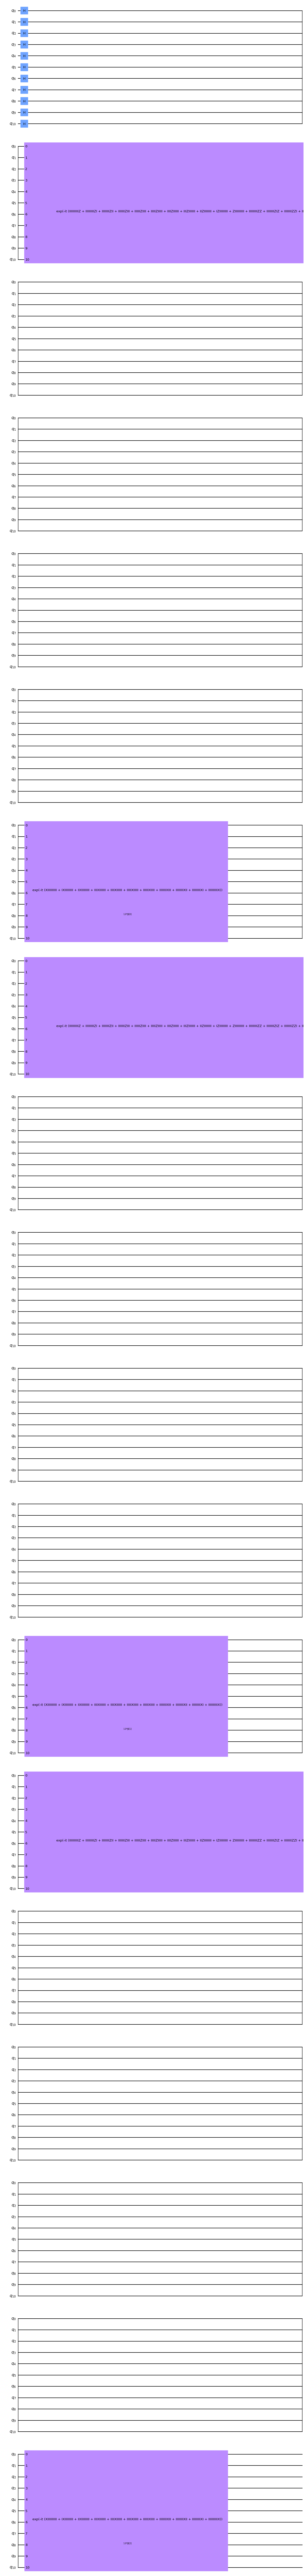

In [13]:
qaoa_mes.ansatz.draw(output = "mpl")